## K-means

Uruchom poniższe demo i poeksperymentuj z różnymi przykładami danych - na których k-means działa dobrze a na których źle?

Demo:  
https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

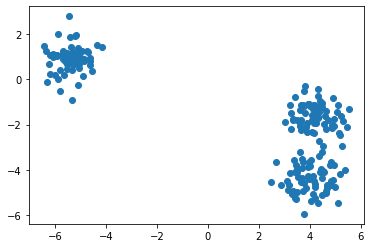

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np

features, labels = make_blobs(n_samples=200, n_features=2,centers = 3, cluster_std=0.6, random_state=123)

plt.scatter(features[:,0], features[:,1])
plt.show()

Zróbmy klasteryzację k-means i zwizualizujmy wyniki

In [6]:
from sklearn.cluster import KMeans

In [8]:
model = KMeans(n_clusters = 3)

In [9]:
cluster_labels = model.fit_predict(features)

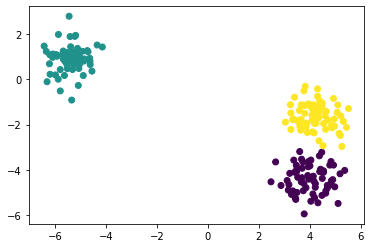

In [12]:
plt.scatter(features[:,0], features[:,1], c=cluster_labels)
plt.show()

In [13]:
model.cluster_centers_

array([[ 4.01047015, -4.4067504 ],
       [-5.3961543 ,  0.91110288],
       [ 4.23149117, -1.61590155]])

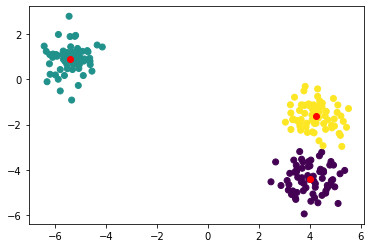

In [14]:
plt.scatter(features[:,0], features[:,1], c=cluster_labels)
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],c = "red")
plt.show()

In [15]:
model = KMeans(n_clusters = 3, verbose = 1)
model.fit(features)

Initialization complete
Iteration 0, inertia 200.16002786354514.
Iteration 1, inertia 134.7530684651172.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 208.74517650142195.
Iteration 1, inertia 134.7530684651172.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 237.02466553314662.
Iteration 1, inertia 146.39807738540236.
Iteration 2, inertia 134.9897763024364.
Iteration 3, inertia 134.7530684651172.
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 160.27708208301618.
Iteration 1, inertia 134.7530684651172.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 389.08071895810195.
Iteration 1, inertia 140.14538790256015.
Iteration 2, inertia 134.7530684651172.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 172.97477949872112.
Iteration 1, inertia 134.7530684651172.
Converged at itera

KMeans(n_clusters=3, verbose=1)

### Transformacja zmiennych

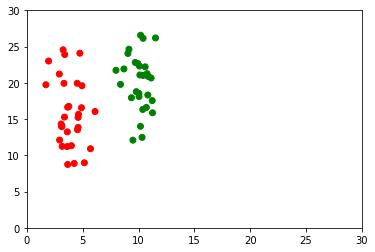

In [20]:
import numpy as np
import numpy.random as rnd

rnd.seed(1)
n = 30
points = np.concatenate([rnd.multivariate_normal((4,15),np.array([[1,0],[0,30]]),n),
                    rnd.multivariate_normal((10,20),np.array([[1,0],[0,30]]),n)],axis=0)
labels = np.repeat([0,1],n)

plt.scatter(points[:,0],points[:,1],c = np.array(["red","green"])[labels])
plt.xlim(0,30)
plt.ylim(0,30)
plt.show()

Zadanie: dopasować model z 2 klastrami, pokolorować grupy i zaznaczyć średnie

In [22]:
model = KMeans(n_clusters = 2)

In [24]:
cluster_labels = model.fit_predict(points)

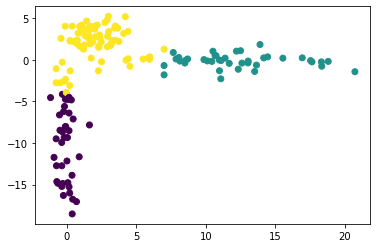

In [26]:
plt.scatter(points[:,0], points[:,1], c=cluster_labels)
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],c = "red")
plt.show()

Grupowanie nastąpiło względem zmiennej y..

Gdy różnica na osi y jest znacząco większa niż rożnica na osi x (y >>x)- patrząc na odegłość euklidesową w takiej sytuacji zachodzi:

$\sqrt{(x_1-x_2)^2 + (y_1-y_2)^2} \approx \sqrt{(y_1-y_2)^2})$

Czyli grupowanie opiera się na zmiennej (zmiennych) dominującej

Dołóżmy standaryzację zmiennych

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [38]:
scaler = StandardScaler()

pipeline = make_pipeline(scaler, KMeans(n_clusters = 2))

cluster_labels = pipeline.fit_predict(points)

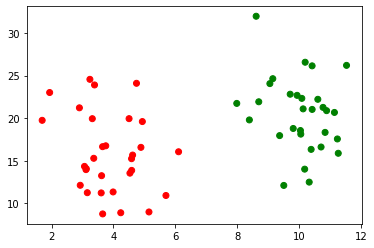

In [47]:
plt.scatter(points[:,0], points[:,1], c= np.array(["red", "green"])[cluster_labels])
plt.show()

Wykonajmy teraz klasteryzację

Zróbmy wersję z pipelinem (standaryzacja + kmeans):

Transformacja obserwacji

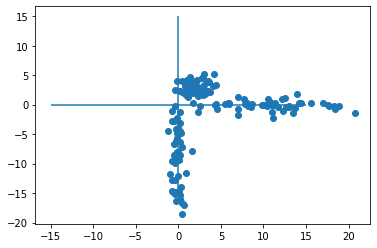

In [48]:
rnd.seed(123)
points = np.concatenate([rnd.multivariate_normal((2,3),np.array([[1,0],[0,1]]),50),
                        rnd.multivariate_normal((10,0),np.array([[30,0],[0,0.5]]),50),
                        rnd.multivariate_normal((0,-8),np.array([[0.3,0],[0,30]]),50)], axis = 0)

plt.scatter(points[:,0],points[:,1])

plt.hlines(0,-15,15)

plt.vlines(0,-15,15)
plt.show()

Zadanie: dopasować model i zwizualizować

In [50]:
model = KMeans(n_clusters = 3)

In [51]:
cluster_labels = model.fit_predict(points)

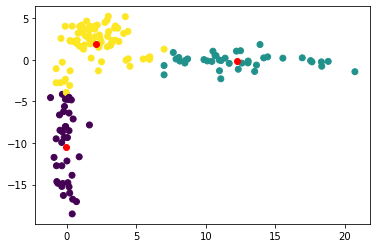

In [52]:
plt.scatter(points[:,0], points[:,1], c=cluster_labels)
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],c = "red")
plt.show()

Jak zmieni się rezultat jak zrobimy standaryzację?

In [71]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer(norm='l1')

pipeline = make_pipeline(scaler, KMeans(n_clusters = 3))

cluster_labels = pipeline.fit_predict(points)

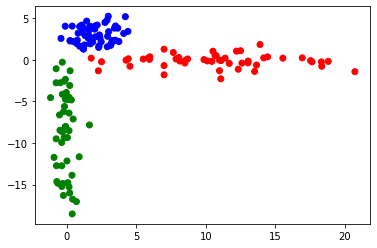

In [72]:
plt.scatter(points[:,0], points[:,1], c= np.array(["red", "green", "blue"])[cluster_labels])
plt.show()

Użyjmy normalizacji (skalowanie na poziomie pojedynczej obserwacji)

In [ ]:
scaler = StandardScaler()

pipeline = make_pipeline(scaler, KMeans(n_clusters = 3))

cluster_labels = pipeline.fit_predict(points)

In [ ]:
plt.scatter(points[:,0], points[:,1], c= np.array(["red", "green", "blue"])[cluster_labels])
plt.show()

Kiedy można użyć normalizacji?  
np gdy interesują nas proporcje (poszczególne zmienne dotyczą podobnych cech) np. grupowanie dokumentów na podstawie treści (dokumenty mogą być różnej długości)

## Klasteryzacja danych klasyfikacyjnych

Zbiór irysy

In [113]:
from sklearn import datasets

iris = datasets.load_iris()
#iris

Zrób histogram dla poszczególnych cech

In [76]:
import pandas as pd

In [96]:
data = pd.DataFrame(iris.data)

data.hist()
plt.show()

In [97]:
data.columns = iris.feature_names

In [98]:
data['class'] = iris.target

Zwizualizuj w seaborn poszczególne pary cech

In [99]:
import seaborn as sns

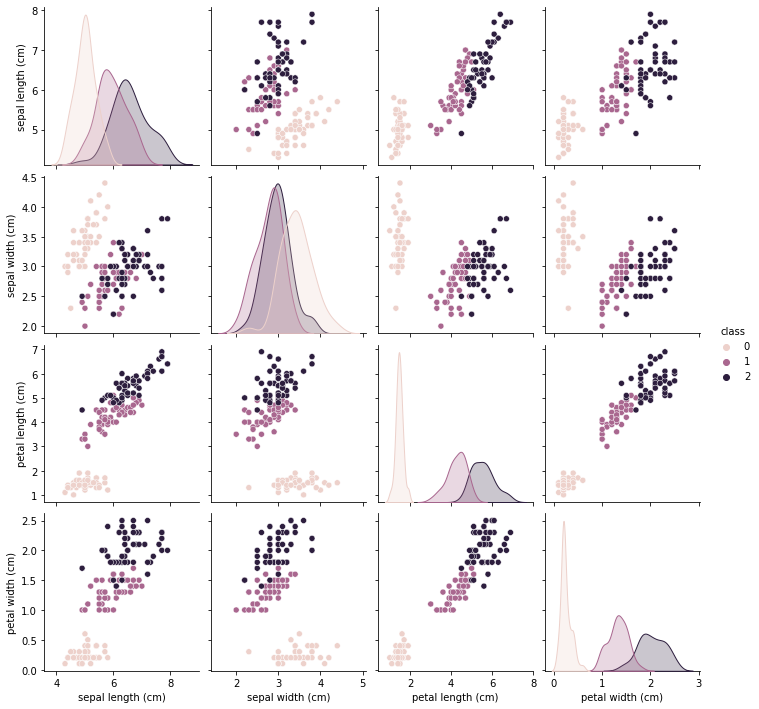

In [101]:
sns.pairplot(data, hue="class")

Zróbmy klasteryzację k-means oraz wyliczmy metrykę V-measure na klasach

In [109]:
model = KMeans(n_clusters=3)

groups = model.fit_predict(iris.data)

from sklearn.metrics.cluster import homogeneity_score, completeness_score, v_measure_score

In [110]:
homogeneity_score(iris.target, groups)

0.7514854021988338

In [111]:
completeness_score(iris.target, groups)

0.7649861514489815

In [112]:
v_measure_score(iris.target, groups)

0.7581756800057784

#### zbiór Wina

In [135]:
from sklearn.datasets import load_wine

wine = load_wine()

Zróbmy klasteryzację k-means i wyliczmy V-measure

In [136]:
data = pd.DataFrame(wine.data)

data.columns = wine.feature_names
data['class'] = wine.target

In [137]:
model = KMeans(n_clusters=3)

groups = model.fit_predict(wine.data)

from sklearn.metrics.cluster import homogeneity_score, completeness_score, v_measure_score

In [138]:
homogeneity_score(data['class'], groups)

0.42881231997856467

In [139]:
completeness_score(data['class'], groups)

0.42870141389448596

In [140]:
v_measure_score(data['class'], groups)

0.42875685976453554

Zróbmy histogram cech

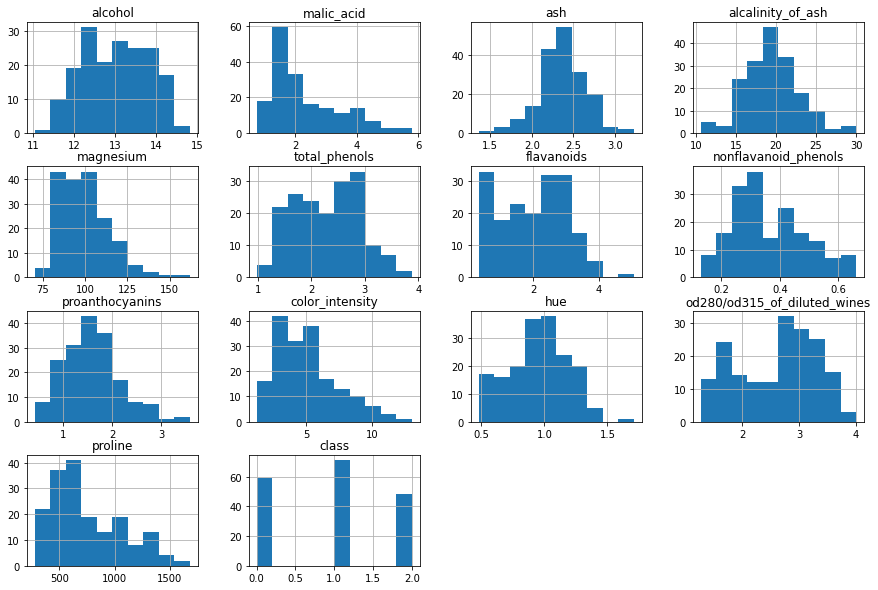

In [143]:
data.hist(figsize=(15,10))
plt.show()

Wykonajmy standaryzację danych

In [144]:
scaler = StandardScaler()

In [145]:
scaled_data = scaler.fit_transform(wine.data)

Ponownie zróbmy klasteryzację i wyliczmy V-measure

In [147]:
model = KMeans(n_clusters = 3)
groups = model.fit_predict(scaled_data)

In [148]:
v_measure_score(data['class'], groups)

0.8758935341223071

## Wyznaczanie liczby klastrów

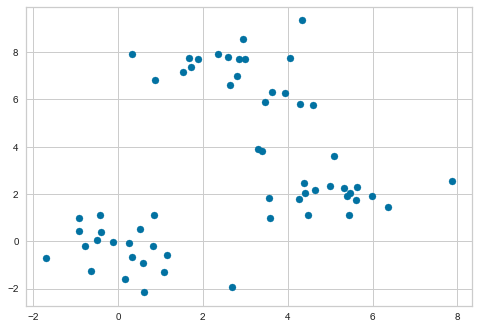

In [222]:
import seaborn as sns
colors = np.array(sns.color_palette("Set2", 20))

points = np.concatenate([rnd.multivariate_normal((0,0),np.array([[1,0],[0,1]]),20),
                    rnd.multivariate_normal((5,2),np.array([[1,0],[0,1]]),20),
                    rnd.multivariate_normal((2,7),np.array([[1,0],[0,1]]),20)],axis=0)

plt.scatter(points[:,0],points[:,1])

plt.show()

Zadanie: Zwizualizuj różną liczbę klastrów (1-6) oraz ich środki. Następnie przedstaw wykres inercji od liczby klastrów.

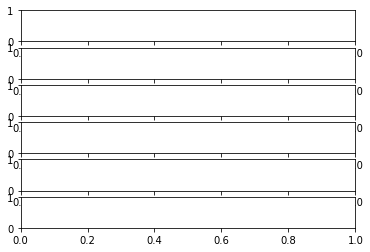

In [152]:
plt.scatter(features[:,0], features[:,1], c=cluster_labels)
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],c = "red")
plt.show()

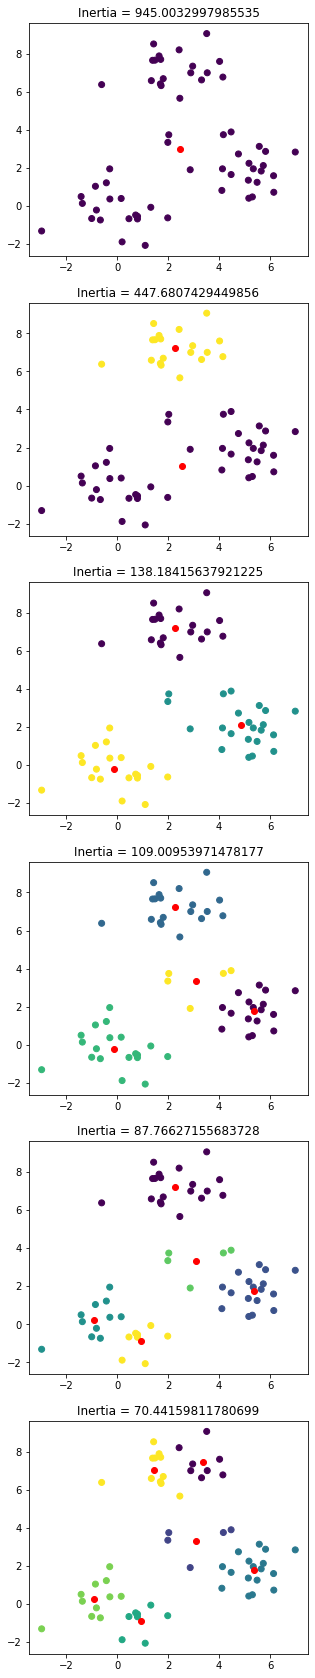

In [180]:
inrtlst=[]
n=6
fig, axis = plt.subplots(n, figsize=(5,30))
for i in range(n):
    model = KMeans(n_clusters = i+1)
    groups = model.fit_predict(points)
    cluster_labels = model.fit_predict(points)
    inrtlst.append(model.inertia_)
    axis[i].scatter(points[:,0], points[:,1], c=cluster_labels)
    axis[i].scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1], c="red")
    axis[i].set_title(f"Inertia = {model.inertia_}")
plt.show()

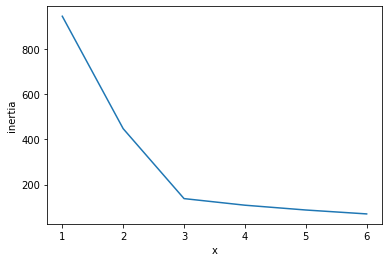

In [178]:
plt.plot(range(1,7), inrtlst)
plt.xlabel('x')
plt.ylabel('inertia')
plt.show()

Zrób wykres Silhouette score od liczby klastrów

In [179]:
from sklearn.metrics import silhouette_score

In [194]:
inertia = []
silhoutte_scr = []
davies_bouldin_scr = []
n=6

for i in range(n):
    model = KMeans(n_clusters = i+1)
    groups = model.fit_predict(points)
    cluster_labels = model.fit_predict(points)
    inertia.append(model.inertia_)
    try:
        silhoutte_scr.append(silhouette_score(points, cluster_labels))
    except: None
    try:
        davies_bouldin_scr.append(davies_bouldin_score(points, cluster_labels))
    except: None

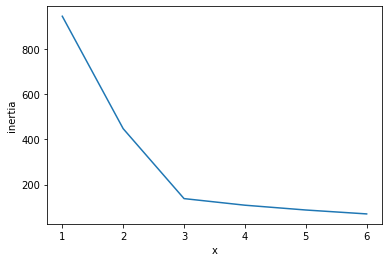

In [191]:
plt.plot(range(1,7), inertia)
plt.xlabel('x')
plt.ylabel('inertia')
plt.show()

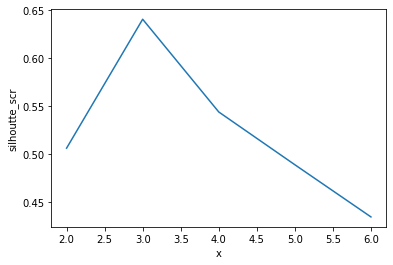

In [192]:
plt.plot(range(2,7), silhoutte_scr)
plt.xlabel('x')
plt.ylabel('silhoutte_scr')
plt.show()

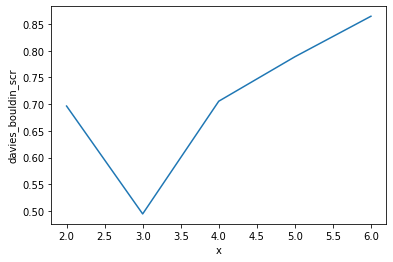

In [195]:
plt.plot(range(2,7), davies_bouldin_scr)
plt.xlabel('x')
plt.ylabel('davies_bouldin_scr')
plt.show()

Zróbmy wykres dla metryk Davies-Bouldin score

In [181]:
from sklearn.metrics import davies_bouldin_score

Zwizualizujmy to jeszcze z użyciem biblioteki yellowbrick

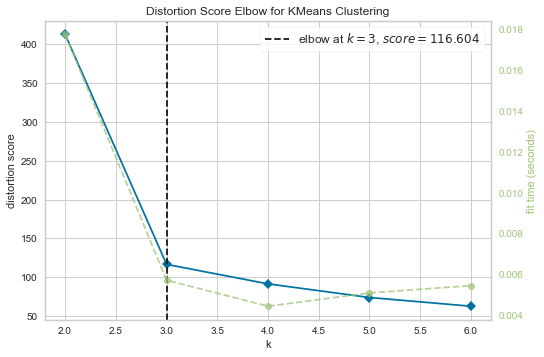

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [223]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters
points

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,7))

visualizer.fit(points)        # Fit the data to the visualizer
visualizer.show()

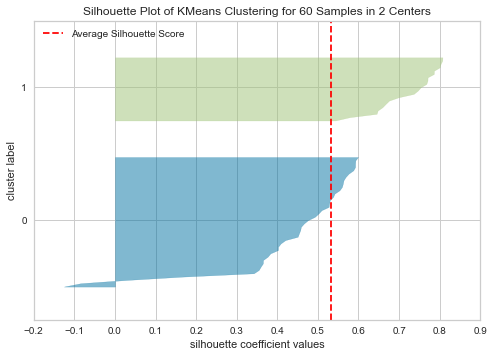

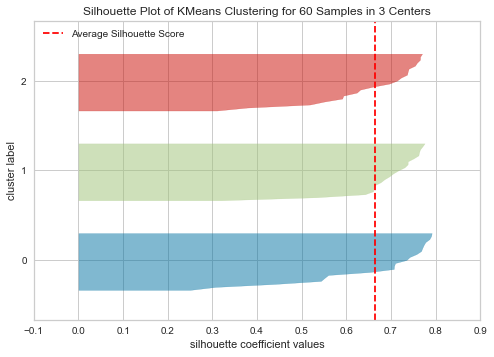

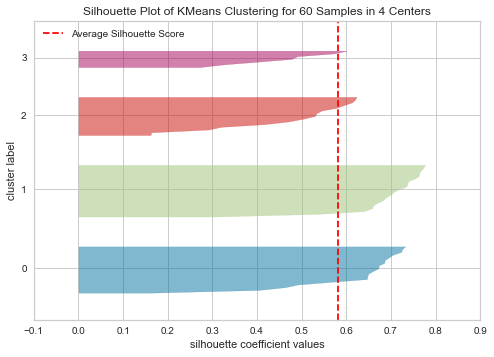

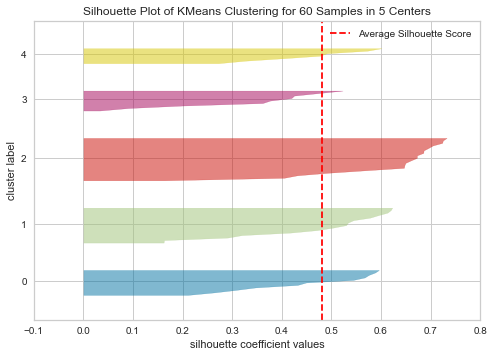

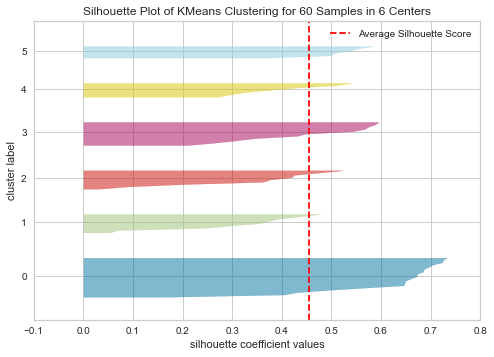

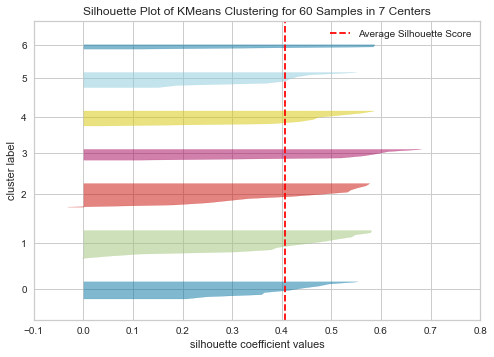

In [224]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

# Load a clustering dataset
points
#groups = model.fit_predict(points)

# Instantiate the clustering model and visualizer
for i in range(2,8):
    model = KMeans(i, random_state=42)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

    visualizer.fit(points)        # Fit the data to the visualizer
    visualizer.show()        # Finalize and render the figure

Zadanie: Spróbuj wyznaczyć liczbę klastrów dla poniższych danych

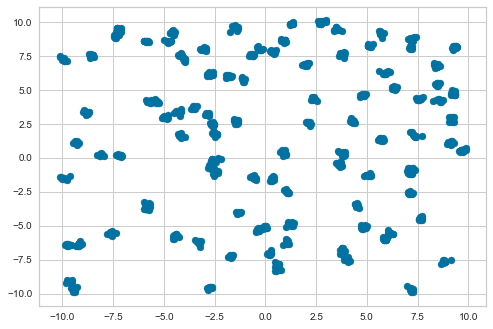

In [228]:
from sklearn.datasets import make_blobs

points, l = make_blobs(1000,centers=100,cluster_std=0.1)

plt.scatter(points[:,0],points[:,1])
plt.show()

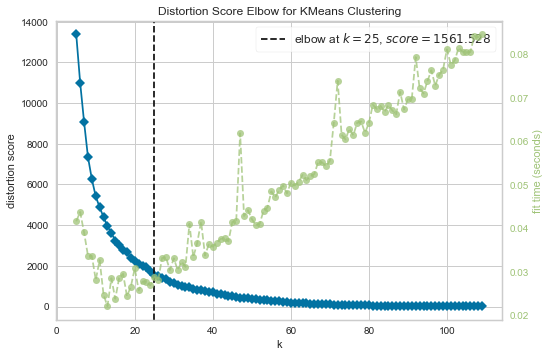

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [235]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters
points

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(5,110))

visualizer.fit(points)        # Fit the data to the visualizer
visualizer.show()

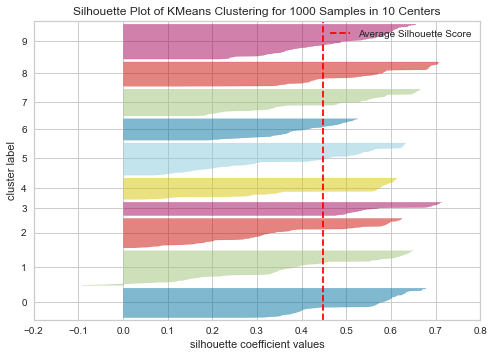

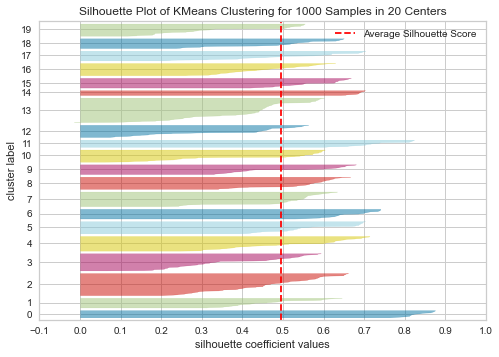

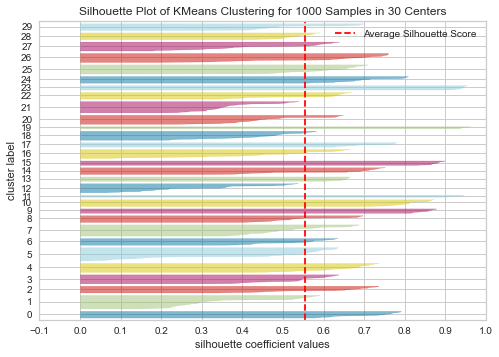

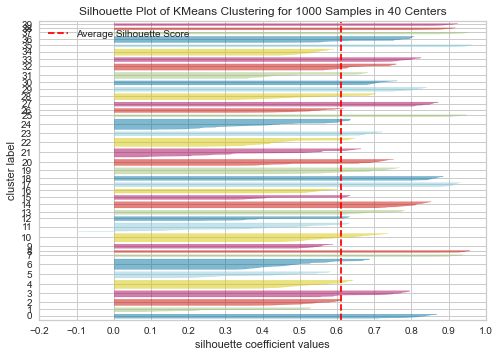

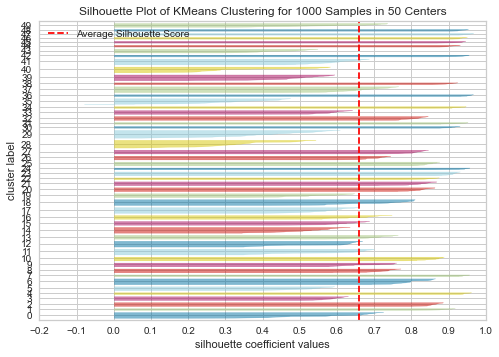

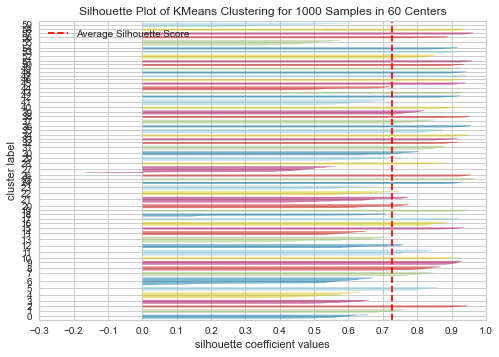

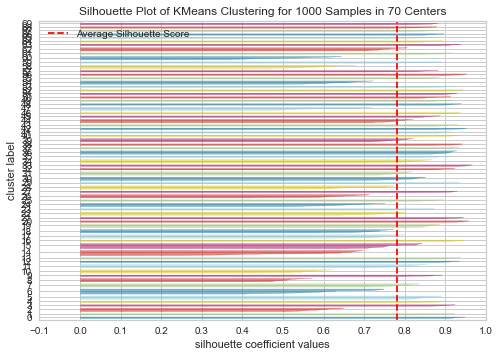

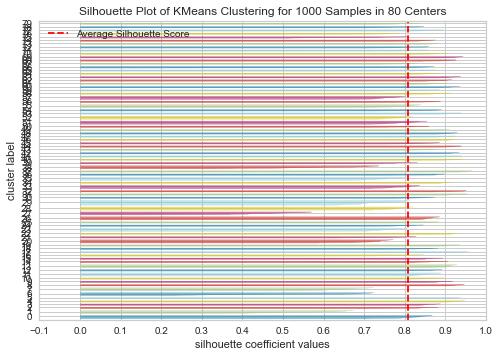

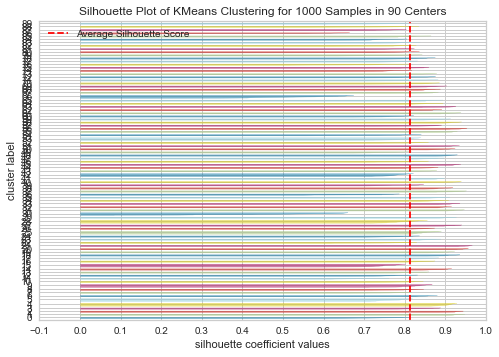

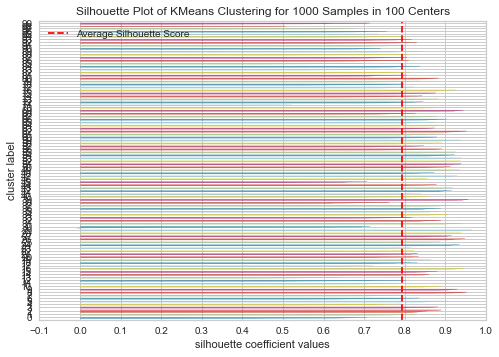

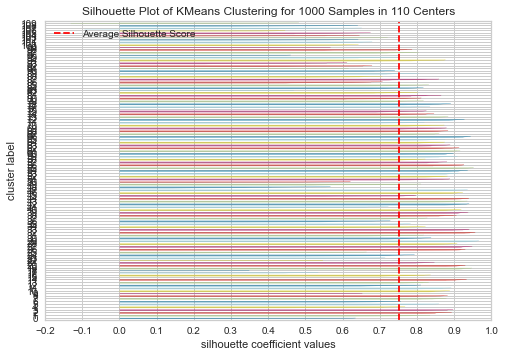

In [234]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

# Load a clustering dataset
points
#groups = model.fit_predict(points)

# Instantiate the clustering model and visualizer
for i in range(10,111,10):
    model = KMeans(i, random_state=42)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

    visualizer.fit(points)        # Fit the data to the visualizer
    visualizer.show()        # Finalize and render the figure

In [ ]:
inertias = []
dbi = []
silhouett = []

ks = range(5,111)
for k in ks:
    model = KMeans(n clusters=k),

Ćwiczenie - wyznacz liczbę klastrów na zbiorze win

In [ ]:
from sklearn.datasets import load_wine

wine = load_wine()
wine

## Grupowanie hierarchiczne

In [236]:
from scipy.cluster.hierarchy import dendrogram, linkage

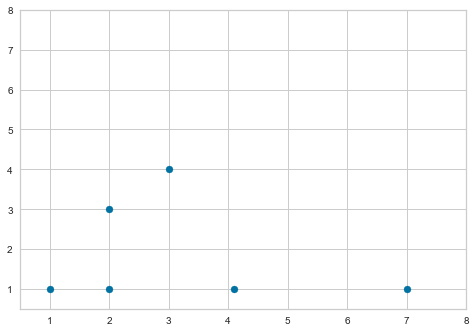

In [237]:
dane = np.array([[1,1],[2,1],[4.1,1],[7,1],[2,3],[3,4]])
plt.scatter(dane[:,0],dane[:,1])
plt.xlim(0.5,8)
plt.ylim(0.5,8)
plt.show()

In [238]:
d = linkage(dane, "single") # 0,1 - ktore klastry laczymy, 2 - odleglosc miedzy nimi, 3 - wielkosc klastra po polaczeniu
d

array([[0.        , 1.        , 1.        , 2.        ],
       [4.        , 5.        , 1.41421356, 2.        ],
       [6.        , 7.        , 2.        , 4.        ],
       [2.        , 8.        , 2.1       , 5.        ],
       [3.        , 9.        , 2.9       , 6.        ]])

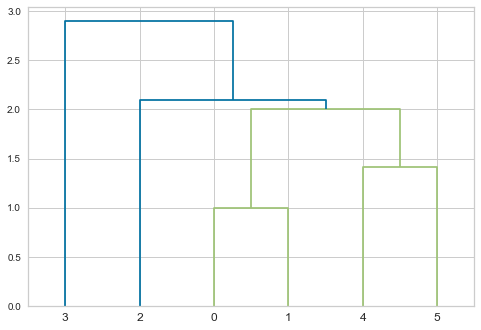

In [239]:
dendrogram(d)
plt.show()

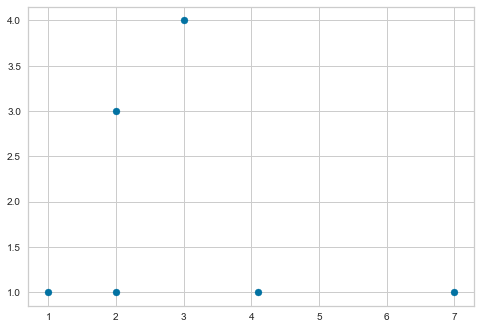

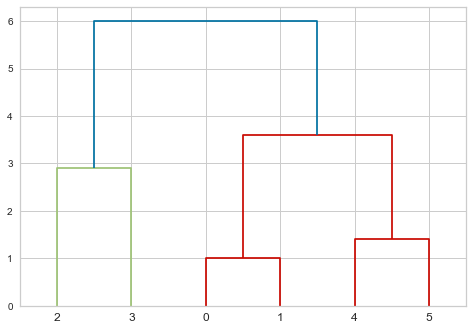

In [243]:
d = linkage(dane,"complete")
plt.scatter(dane[:,0],dane[:,1])
plt.show()
dendrogram(d)
plt.show()

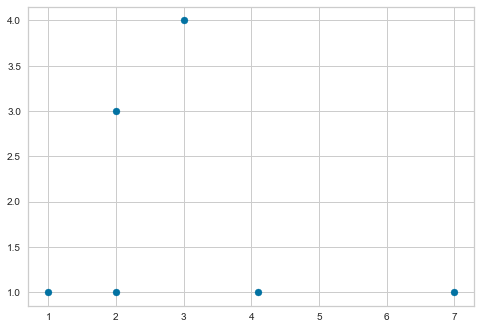

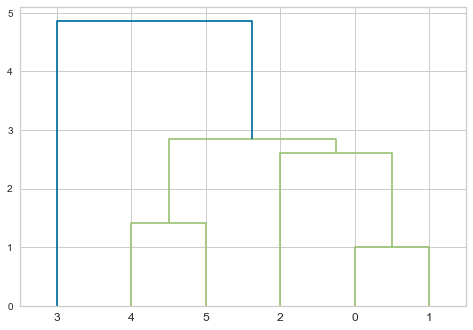

In [244]:
d = linkage(dane,"average")
plt.scatter(dane[:,0],dane[:,1])
plt.show()
dendrogram(d)
plt.show()

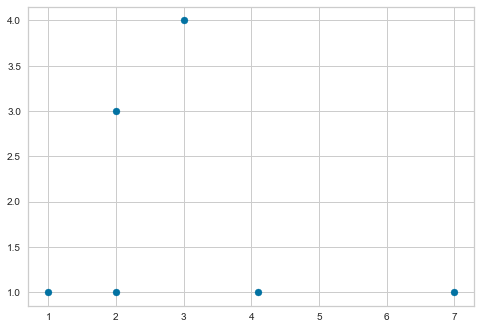

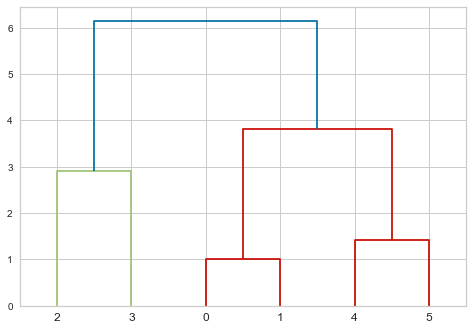

In [245]:
d = linkage(dane,"ward")
plt.scatter(dane[:,0],dane[:,1])
plt.show()
dendrogram(d)
plt.show()

Zobaczmy jak działają poszczególne metody łączenia klastrów na nieco większych danych

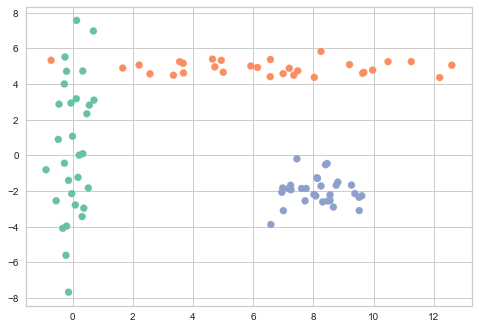

In [252]:
rnd.seed(123)
points = np.concatenate([rnd.multivariate_normal((0,0),np.array([[0.1,0],[0,10]]),30),
                    rnd.multivariate_normal((6,5),np.array([[10,0],[0,0.1]]),30),
                    rnd.multivariate_normal((8,-2),np.array([[1,0],[0,1]]),30)],axis=0)
labels = np.repeat(range(3),30)

import seaborn as sns
colors = sns.color_palette("Set2", 20)
plt.scatter(points[:,0],points[:,1],c=np.array(colors)[labels])
plt.show()

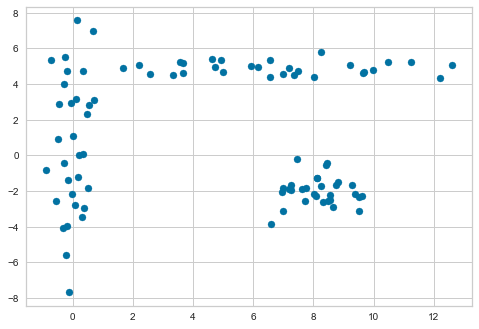

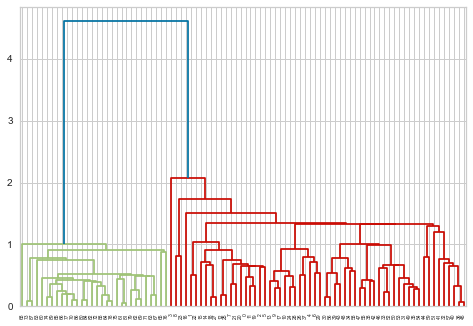

In [263]:
d = linkage(points,"single")
plt.scatter(points[:,0],points[:,1])
plt.show()
dendrogram(d)
plt.show()

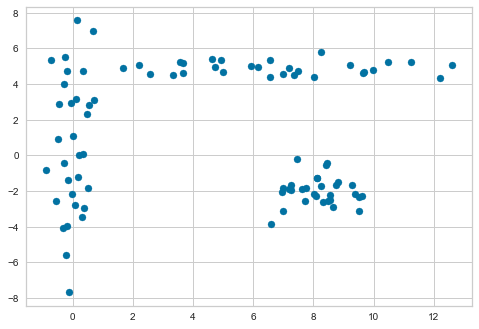

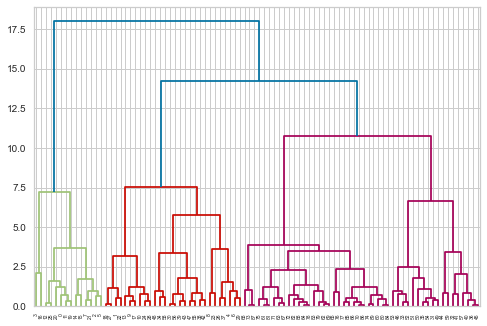

In [253]:
d = linkage(points,"complete")
plt.scatter(points[:,0],points[:,1])
plt.show()
dendrogram(d)
plt.show()

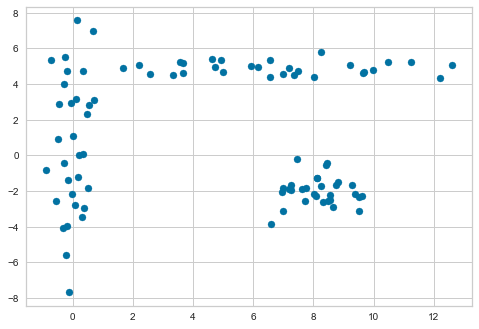

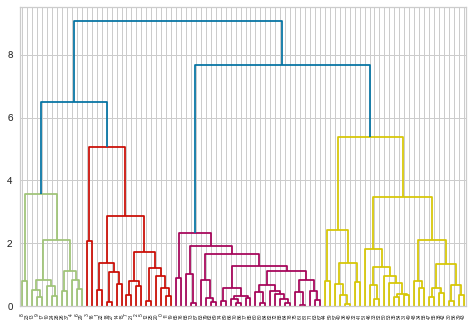

In [255]:
d = linkage(points,"average")
plt.scatter(points[:,0],points[:,1])
plt.show()
dendrogram(d)
plt.show()

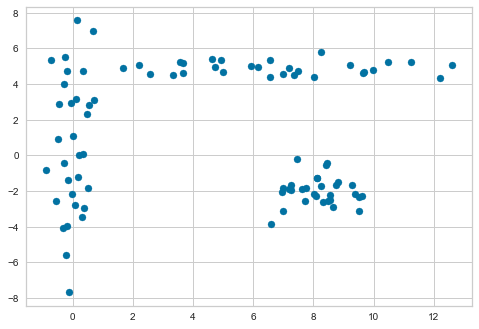

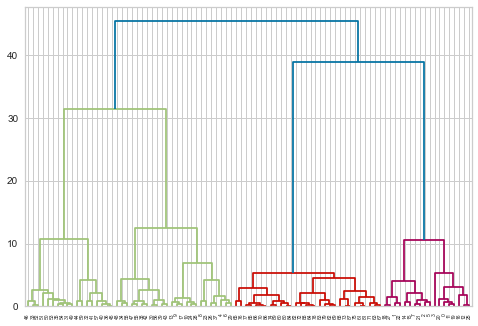

In [256]:
d = linkage(points,"ward")
plt.scatter(points[:,0],points[:,1])
plt.show()
dendrogram(d)
plt.show()

Inny przypadek - klastry bliżej siebie

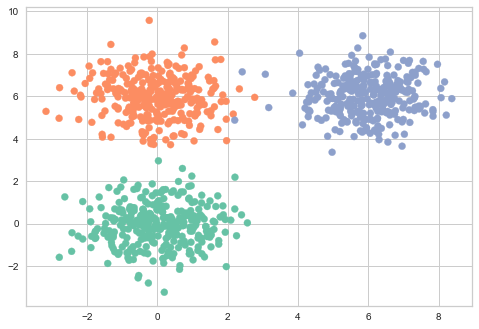

In [278]:
rnd.seed(123)
p_num=300
points = np.concatenate([rnd.multivariate_normal((0,0),np.array([[1,0],[0,1]]),p_num),
                    rnd.multivariate_normal((0,6),np.array([[1,0],[0,1]]),p_num),
                    rnd.multivariate_normal((6,6),np.array([[1,0],[0,1]]),p_num)],axis=0)
labels = np.repeat(range(3),p_num)

import seaborn as sns
colors = sns.color_palette("Set2", 20)
plt.scatter(points[:,0],points[:,1],c=np.array(colors)[labels])
plt.show()

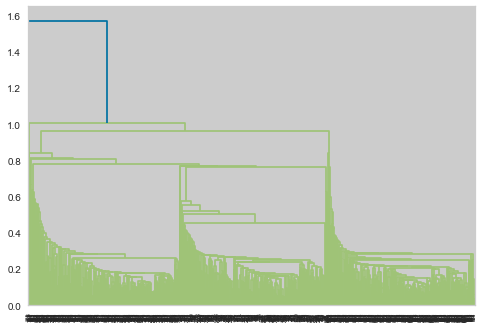

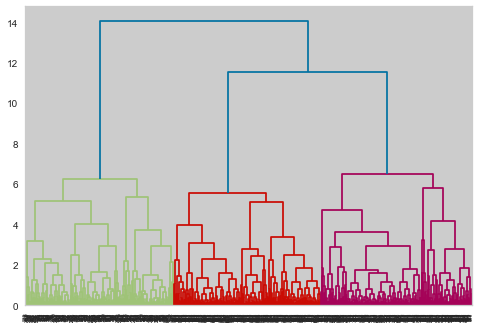

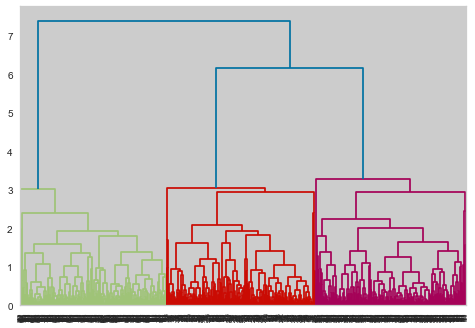

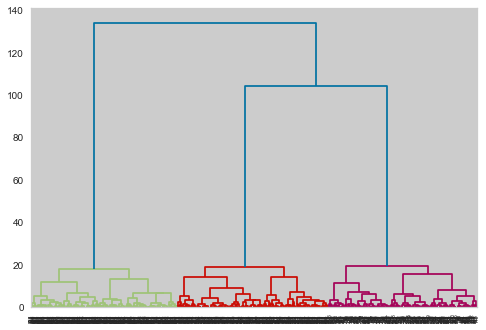

In [280]:
data = points
d = linkage(data,"single")
dendrogram(d)
plt.show()
d = linkage(data,"complete")
dendrogram(d)
plt.show()
d = linkage(data,"average")
dendrogram(d)
plt.show()
d = linkage(data,"ward")
dendrogram(d)
plt.show()

Zbiór z 2 liniami punktów

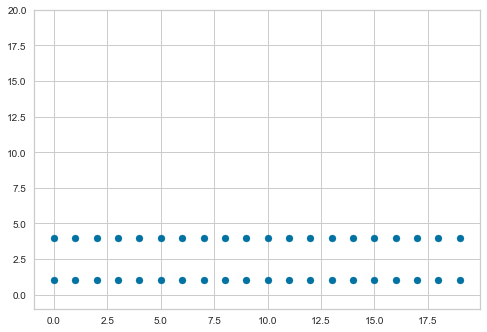

In [264]:
x = np.vstack([np.tile(range(20),2),np.repeat(np.array([1,4]),20)]).T

plt.scatter(x[:,0],x[:,1])
plt.ylim(-1,20)
plt.show()

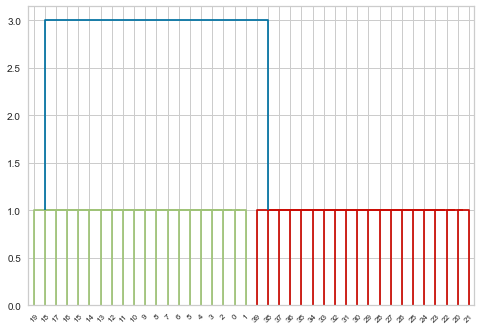

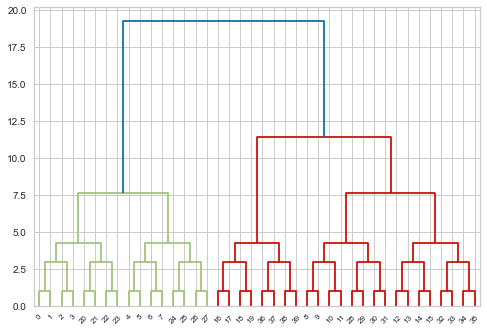

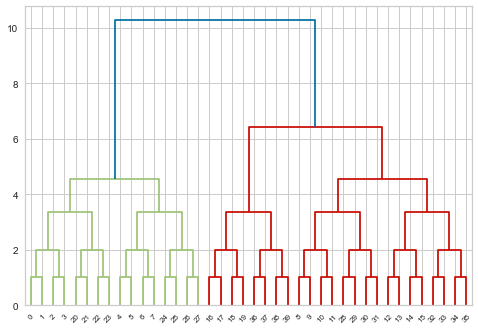

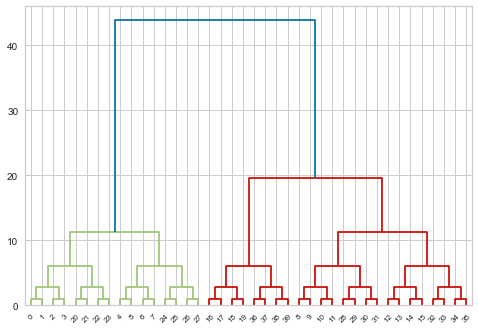

In [281]:
data = x
d = linkage(data,"single")
dendrogram(d)
plt.show()
d = linkage(data,"complete")
dendrogram(d)
plt.show()
d = linkage(data,"average")
dendrogram(d)
plt.show()
d = linkage(data,"ward")
dendrogram(d)
plt.show()

Zbiór ziarna zbóż

In [269]:
samples = np.loadtxt("Data/seeds_dataset.txt")

In [270]:
samples = pd.DataFrame(samples)
samples

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1.0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1.0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1.0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1.0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1.0
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3.0
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3.0
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3.0
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3.0


In [271]:
samples.columns = ["area", "perimeter", "compactness", "kernel_length", "kernel_width", "asymmetry", 
                   "kernel_groove_length", "variety"]

In [272]:
samples.head()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry,kernel_groove_length,variety
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1.0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1.0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1.0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1.0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1.0


In [273]:
samples.describe()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry,kernel_groove_length,variety
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


Przeanalizuj zachowanie różnych łączeń klastrów - najpierw na surowych danych, a później na przeskalowanych

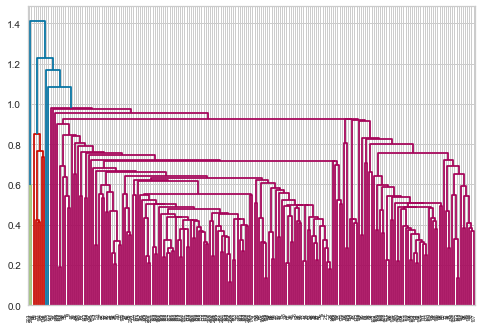

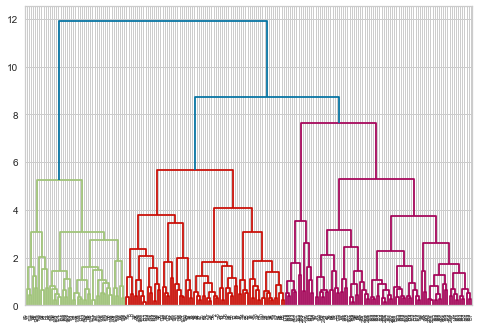

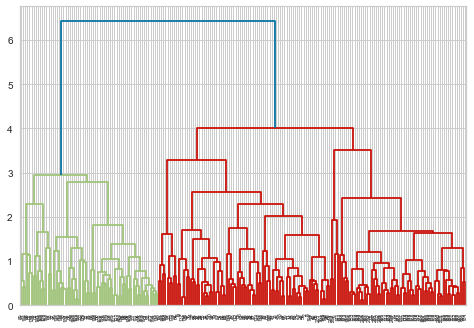

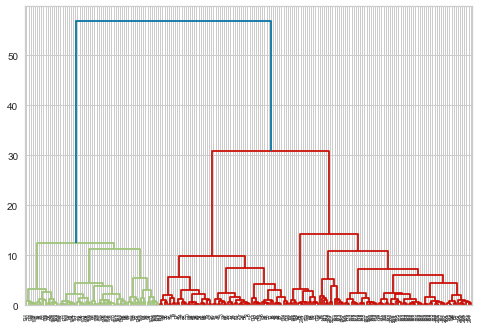

In [294]:
data = samples.iloc[:,:-1]
d = linkage(data,"single")
dendrogram(d)
plt.show()
d = linkage(data,"complete")
dendrogram(d)
plt.show()
d = linkage(data,"average")
dendrogram(d)
plt.show()
d = linkage(data,"ward")
dendrogram(d)
plt.show()

### Wyznaczenie liczby klastrów

Przykład

In [ ]:
dane = np.array([[1,1],[2,1],[6,1],[7,1],[2,3],[3,4]])
plt.scatter(dane[:,0],dane[:,1])
plt.xlim(0.5,8)
plt.ylim(0.5,8)
plt.show()

Na podstawie dendrogramu

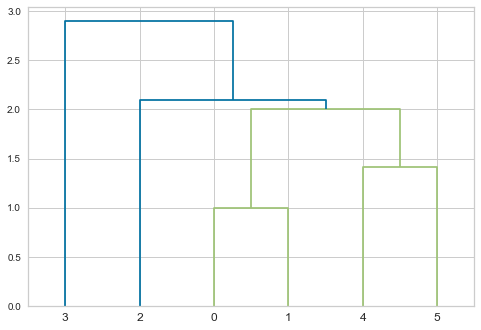

In [299]:
mergings = linkage(dane,method="single")
dendrogram(mergings)
plt.show()

Obcinamy tam, gdzie skok jest duży albo na poziomie, który wydaje się nam najsensowniejszy. Możemy obciąć wg odległości

In [297]:
from scipy.cluster.hierarchy import fcluster

?fcluster

Signature: fcluster(Z, t, criterion='inconsistent', depth=2, R=None, monocrit=None)
Docstring:
Form flat clusters from the hierarchical clustering defined by
the given linkage matrix.

Parameters
----------
Z : ndarray
    The hierarchical clustering encoded with the matrix returned
    by the `linkage` function.
t : scalar
    For criteria 'inconsistent', 'distance' or 'monocrit',
     this is the threshold to apply when forming flat clusters.
    For 'maxclust' or 'maxclust_monocrit' criteria,
     this would be max number of clusters requested.
criterion : str, optional
    The criterion to use in forming flat clusters. This can
    be any of the following values:

      ``inconsistent`` :
          If a cluster node and all its
          descendants have an inconsistent value less than or equal
          to `t`, then all its leaf descendants belong to the
          same flat cluster. When no non-singleton cluster meets
          this criterion, every node is assigned to its own
   

In [300]:
mergings

array([[0.        , 1.        , 1.        , 2.        ],
       [4.        , 5.        , 1.41421356, 2.        ],
       [6.        , 7.        , 2.        , 4.        ],
       [2.        , 8.        , 2.1       , 5.        ],
       [3.        , 9.        , 2.9       , 6.        ]])

In [306]:
fcluster(mergings,t=0.5,criterion="distance")

array([1, 2, 5, 6, 3, 4], dtype=int32)

In [307]:
fcluster(mergings,t=1,criterion="distance")

array([1, 1, 4, 5, 2, 3], dtype=int32)

In [308]:
fcluster(mergings,t=1.5,criterion="distance")

array([1, 1, 3, 4, 2, 2], dtype=int32)

In [309]:
fcluster(mergings,t=3,criterion="distance")

array([1, 1, 1, 1, 1, 1], dtype=int32)

Gdy wiemy ile chcemy mieć klastrów, możemy obciąć po liczbie klastrów

In [310]:
fcluster(mergings, 3, 'maxclust')

array([1, 1, 2, 3, 1, 1], dtype=int32)

Wyznaczyć liczbę klastrów dla zbioru ziaren

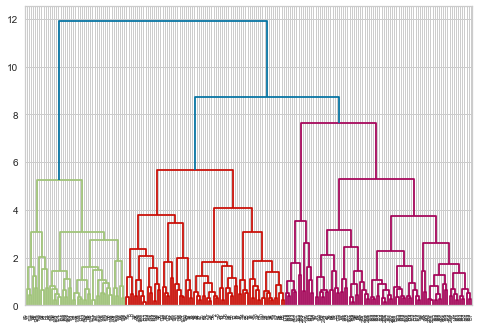

In [312]:
data = samples.iloc[:,:-1]
d = linkage(data,"complete")
dendrogram(d)
plt.show()

In [313]:
fcluster(d,t=8,criterion="distance")

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2,
       2, 3, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       2, 2, 2, 3, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [314]:
fcluster(d, 3, 'maxclust')

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2,
       2, 3, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       2, 2, 2, 3, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

Zadanie: pogrupować hierarchicznie kraje na podstawie oddanych przez nie głosów w Eurowizji

In [320]:
from scipy.io import loadmat
eurowizja = loadmat("Data/eu_song_2014.mat")
eurowizja;

In [317]:
eurowizja = loadmat("Data/eu_song_2014.mat")["x"][0][0]
dane = eurowizja[0]
rows = eurowizja[1][0][0]
columns = eurowizja[5]
columns

array(['Ukraine       ', 'Belarus       ', 'Azerbaijan    ',
       'Iceland       ', 'Norway        ', 'Romania       ',
       'Armenia       ', 'Montenegro    ', 'Greece        ',
       'Poland        ', 'Austria       ', 'Germany       ',
       'Sweden        ', 'France        ', 'Russia        ',
       'Italy         ', 'Slovenia      ', 'Finland       ',
       'Spain         ', 'Switzerland   ', 'Hungary       ',
       'Malta         ', 'Denmark       ', 'Netherlands   ',
       'San Marino    ', 'United Kingdom'], dtype='<U14')

In [318]:
dane = pd.DataFrame(dane,columns=columns)
dane.set_index(rows,inplace=True)
dane.head()

,Ukraine,Belarus,Azerbaijan,Iceland,Norway,Romania,Armenia,Montenegro,Greece,Poland,...,Slovenia,Finland,Spain,Switzerland,Hungary,Malta,Denmark,Netherlands,San Marino,United Kingdom
Albania,0,0,0,0,0,0,0,6,0,2,...,0,0,12,0,8,1,0,0,3,0
Armenia,0,8,0,0,0,0,0,12,0,7,...,0,0,2,5,0,0,1,4,3,0
Austria,5,0,0,2,1,8,12,0,0,0,...,0,4,0,3,7,0,0,10,0,0
Azerbaijan,10,7,0,0,0,6,0,0,2,4,...,0,0,0,0,8,5,0,0,3,0
Belarus,8,0,3,0,4,1,10,0,7,6,...,0,0,0,0,5,0,0,2,0,0


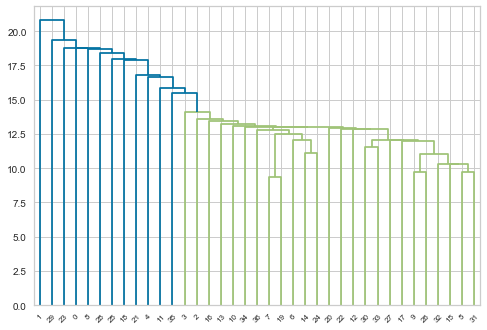

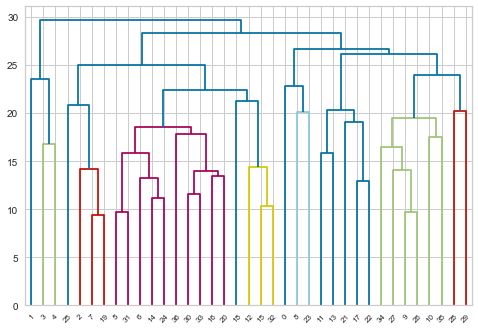

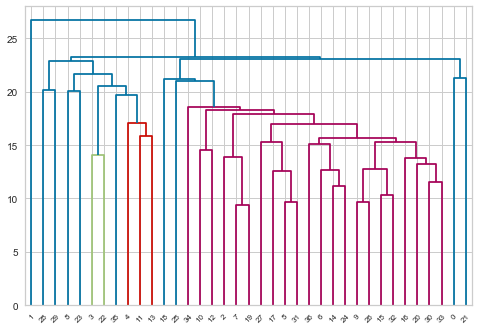

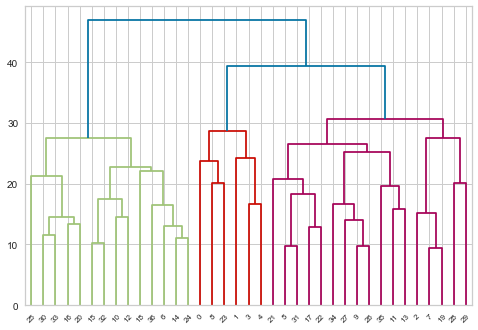

In [321]:
data = dane
d = linkage(data,"single")
dendrogram(d)
plt.show()
d = linkage(data,"complete")
dendrogram(d)
plt.show()
d = linkage(data,"average")
dendrogram(d)
plt.show()
d = linkage(data,"ward")
dendrogram(d)
plt.show()

In [328]:
clustered = fcluster(d,t=6,criterion="maxclust")
clustered

array([2, 3, 5, 3, 3, 4, 1, 5, 2, 4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 5, 1, 4,
       4, 2, 1, 1, 4, 4, 6, 6, 1, 4, 1, 1, 4, 4, 1], dtype=int32)

In [331]:
pd.DataFrame({"country": data.index, "choice": clustered}).sort_values("choice")

,country,choice
18,Latvia,1
33,Sweden,1
32,Spain,1
30,San_Marino,1
25,Norway,1
24,Netherlands,1
20,Macedonia,1
16,Israel,1
15,Ireland,1
14,Iceland,1


Zadanie: Potestować różne przekształcenia danych i ocenić czy dla innych postaci danych wyniki są bardziej zgodne z intuicją. Spróbować wyciągnąć wnioski.

In [333]:
data = StandardScaler().fit_transform(dane)

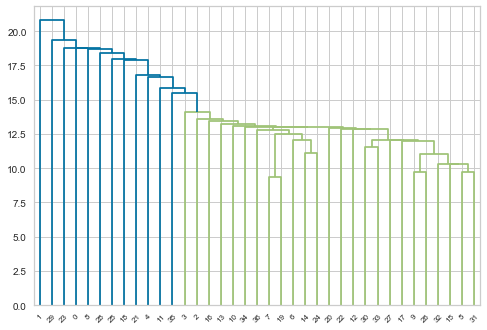

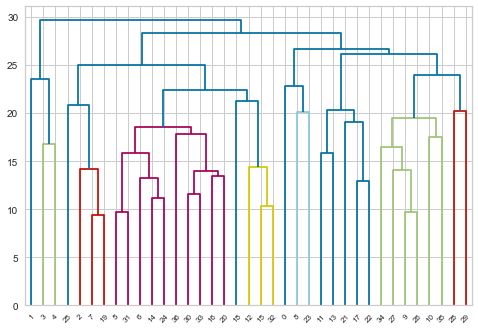

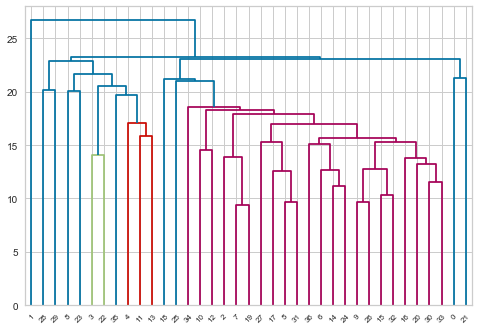

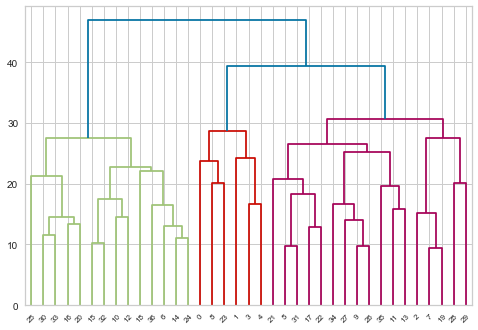

In [334]:
data = dane
d = linkage(data,"single")
dendrogram(d)
plt.show()
d = linkage(data,"complete")
dendrogram(d)
plt.show()
d = linkage(data,"average")
dendrogram(d)
plt.show()
d = linkage(data,"ward")
dendrogram(d)
plt.show()

In [335]:
pd.DataFrame({"country": data.index, "choice": clustered}).sort_values("choice")

,country,choice
18,Latvia,1
33,Sweden,1
32,Spain,1
30,San_Marino,1
25,Norway,1
24,Netherlands,1
20,Macedonia,1
16,Israel,1
15,Ireland,1
14,Iceland,1


In [357]:
pip install geos

Note: you may need to restart the kernel to use updated packages.


In [358]:
pip install cartopy

  Using cached Cartopy-0.20.3.tar.gz (10.8 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [2 lines of output]
      <string>:117: UserWarning: Unable to determine GEOS version. Ensure you have 3.7.2 or later installed, or installation may fail.
      Proj 8.0.0 must be installed.
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.
Note: you may need to restart the kernel to use updated packages.


In [353]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.io.shapereader as shpreader
import itertools
import numpy as np

shapename = 'admin_0_countries'
countries_shp = shpreader.natural_earth(resolution='110m',
                                        category='cultural', name=shapename)

# some nice "earthy" colors
earth_colors = np.array([(199, 233, 192),
                                (161, 217, 155),
                                (116, 196, 118),
                                (65, 171, 93),
                                (35, 139, 69),
                                ]) / 255.
earth_colors = itertools.cycle(earth_colors)



ax = plt.axes(projection=ccrs.PlateCarree())
for country in shpreader.Reader(countries_shp).records():
    print(country.attributes['name_long'], earth_colors.next())
    ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                      facecolor=earth_colors.next(),
                      label=country.attributes['name_long'])

plt.show()

ModuleNotFoundError: No module named 'cartopy'

zoo dataset

In [ ]:
zoo = fetch_openml('zoo')
zoo

In [ ]:
zoo_data = pd.DataFrame(zoo.data)
zoo_data.columns = zoo.feature_names

In [ ]:
zoo_data

Zróbmy klasteryzację i zwizualizujmy dendrogram